# Configuring pandas

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date

# Set formattign options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

# a common seed value for random number generation
seedval = 111111

# Creating time-series charts 

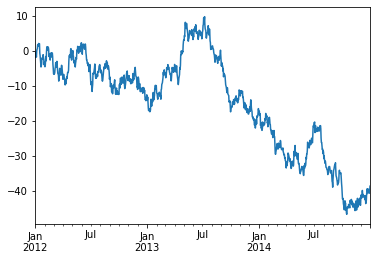

In [2]:
# generate a random walk time-series
np.random.seed(seedval)
s = pd.Series(np.random.randn(1096),
              index=pd.date_range('2012-01-01', 
                                  '2014-12-31'))
walk_ts = s.cumsum()
# this plots the walk - just that easy :)
walk_ts.plot();

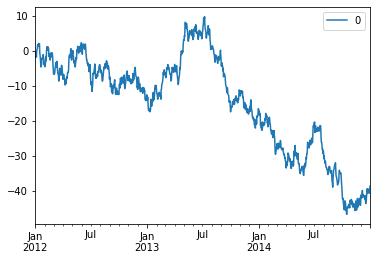

In [3]:
# a DataFrame with a single column will produce
# the same plot as plotting the Series it is created from
# dataframe 可以依據欄位各自畫圖
walk_df = pd.DataFrame(walk_ts)
walk_df.plot();

In [4]:
# generate two random walks, one in each of 
# two columns in a DataFrame
np.random.seed(seedval)
df = pd.DataFrame(np.random.randn(1096, 2), 
                  index=walk_ts.index, columns=list('AB'))
walk_df = df.cumsum()
walk_df.head()

                   A         B
2012-01-01 -1.878324  1.362367
2012-01-02 -2.804186  1.427261
2012-01-03 -3.241758  3.165368
2012-01-04 -2.750550  3.332685
2012-01-05 -1.620667  2.930017

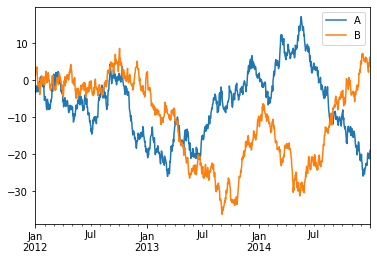

In [5]:
# plot the DataFrame, which will plot a line
# for each column, with a legend
walk_df.plot();

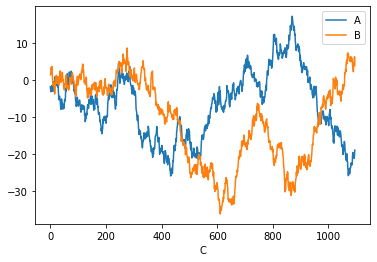

In [6]:
# 客製化 X 軸顯示資訊以及要畫哪些欄位
# copy the walk
df2 = walk_df.copy()
# add a column C which is 0 .. 1096
df2['C'] = pd.Series(np.arange(0, len(df2)), index=df2.index)
# instead of dates on the x-axis, use the 'C' column,
# which will label the axis with 0..1000
df2.plot(x='C', y=['A', 'B']);

# Adding a title and changing axes labels

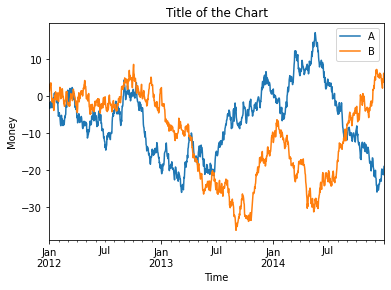

In [7]:
# create a time-series chart with a title and specific 
# x and y axis labels

# title is set in the .plot() method as a parameter
walk_df.plot(title='Title of the Chart')
# explicitly set the x and y axes labels after the .plot()
# 畫圖之前，可以透過全域設定調整 XY 軸標籤
plt.xlabel('Time')
plt.ylabel('Money');

# Specifying legend content and position

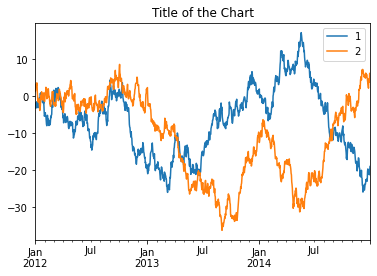

In [8]:
# change the legend items to be different 
# from the names of the columns in the DataFrame
# plot 函數會回傳控制物件，可設定各資料標籤
ax = walk_df.plot(title='Title of the Chart')
# this sets the legend labels
ax.legend(['1', '2']);

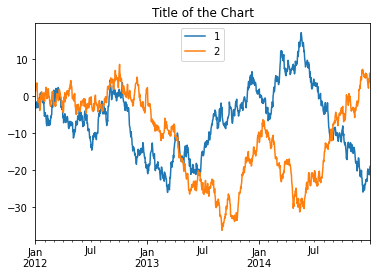

In [9]:
# change the position of the legend
ax = walk_df.plot(title='Title of the Chart')
# put the legend in the upper center of the chart
ax.legend(['1', '2'], loc='upper center');

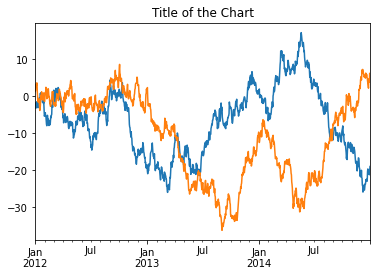

In [10]:
# omit the legend by using legend=False
walk_df.plot(title='Title of the Chart', legend=False);

# Specifying line colors, styles, thickness and markers

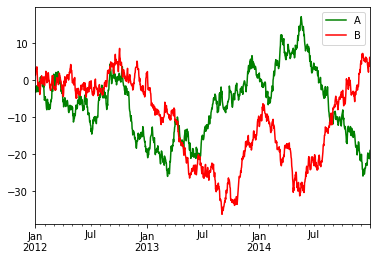

In [11]:
# change the line colors on the plot
# use character code for the first line, 
# hex RGB for the second
# line style 第一段表示顏色，第二段表示樣式，第三段表示標記
# 色彩代碼參考 https://matplotlib.org/tutorials/colors/colors.html
# 樣式參考 https://matplotlib.org/gallery/lines_bars_and_markers/linestyles.html
# 標記參考 https://matplotlib.org/api/markers_api.html#module-matplotlib.markers
walk_df.plot(style=['g', '#FF0000']);

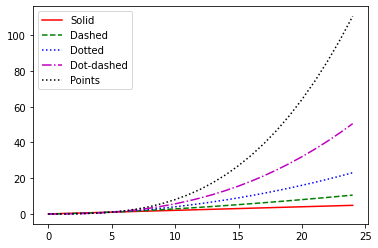

In [12]:
# show off different line styles
t = np.arange(0., 5., 0.2)
legend_labels = ['Solid', 'Dashed', 'Dotted', 
                 'Dot-dashed', 'Points']
line_style = pd.DataFrame({0 : t,
                           1 : t**1.5,
                           2 : t**2.0,
                           3 : t**2.5,
                           4 : t**3.0})
# generate the plot, specifying color and line style for each line
ax = line_style.plot(style=['r-', 'g--', 'b:', 'm-.', 'k:'])
# set the legend
ax.legend(legend_labels, loc='upper left');

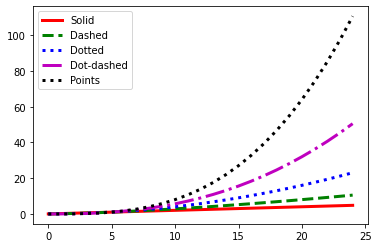

In [40]:
# regenerate the plot, specifying color and line style
# for each line and a line width of 3 for all lines
# 可統一指定線段寬度
ax = line_style.plot(style=['r-', 'g--', 'b:', 'm-.', 'k:'], lw=3)
ax.legend(legend_labels, loc='upper left');

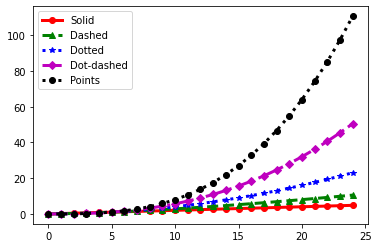

In [41]:
# redraw, adding markers to the lines
ax = line_style.plot(style=['r-o', 'g--^', 'b:*', 
                            'm-.D', 'k:o'], lw=3)
ax.legend(legend_labels, loc='upper left');

# Specifying tick mark locations and tick labels

Text(0, 0, '')

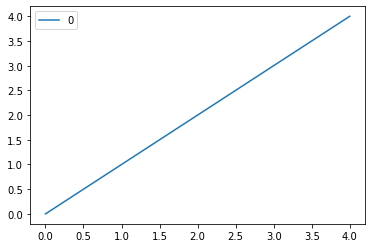

In [15]:
# a simple plot to use to examine ticks
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
# 可由全域設定取得 X 軸刻度資訊
ticks, labels = plt.xticks()
ticks
labels[0]

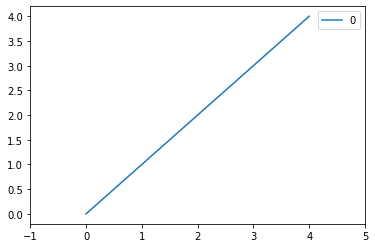

In [16]:
# resize x-axis to (-1, 5), and draw ticks
# only at integer values
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
# 可修改全域設定調整 X 軸刻度資訊
plt.xticks(np.arange(-1, 6));

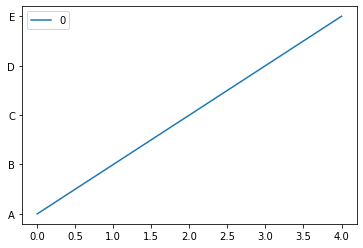

In [17]:
# rename y-axis tick labels to A, B, C, D, and E
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
# 也可修改全域設定調整 Y 軸刻度資訊
plt.yticks(np.arange(0, 5), list("ABCDE"));

# Formatting axes tick date labels using formatters

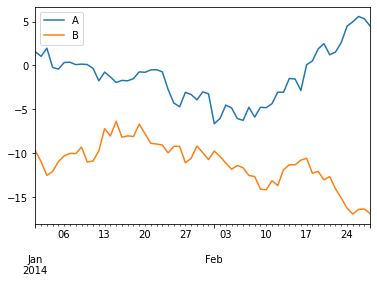

In [18]:
# plot January-February 2014 from the random walk
walk_df.loc['2014-01':'2014-02'].plot();

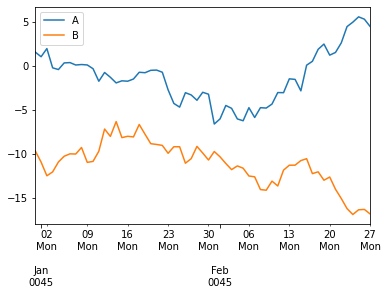

In [19]:
# this import styles helps us type less
from matplotlib.dates import WeekdayLocator, \
DateFormatter, MonthLocator

# plot Jan-Feb 2014
ax = walk_df.loc['2014-01':'2014-02'].plot()

# X 軸可以有二階層刻度
# do the minor labels
# 從星期一開始，每週一個刻度
weekday_locator = WeekdayLocator(byweekday=(0), interval=1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter("%d\n%a"))

# do the major labels
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'))

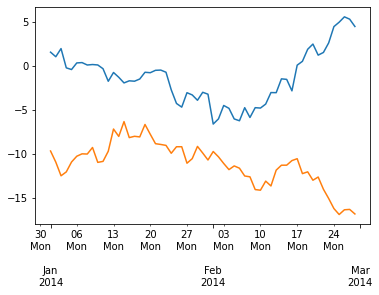

In [20]:
# this gets around the pandas / matplotlib year issue
# need to reference the subset twice, so let's make a variable
walk_subset = walk_df['2014-01':'2014-02']

# 透過 matplotlib 取得控制物件，進行 X 軸日期資料轉換
# this gets the plot so we can use it, we can ignore fig
fig, ax = plt.subplots()

# inform matplotlib that we will use the following as dates
# note we need to convert the index to a pydatetime series
ax.plot_date(walk_subset.index.to_pydatetime(), walk_subset, '-')

# do the minor labels
weekday_locator = WeekdayLocator(byweekday=(0), interval=1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter('%d\n%a'))

# do the major labels
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'));

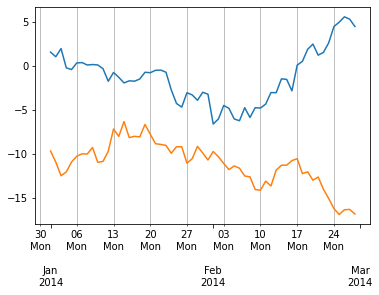

In [21]:
# this gets the plot so we can use it, we can ignore fig
fig, ax = plt.subplots()

# inform matplotlib that we will use the following as dates
# note we need to convert the index to a pydatetime series
ax.plot_date(walk_subset.index.to_pydatetime(), walk_subset, '-')

# do the minor labels
weekday_locator = WeekdayLocator(byweekday=(0), interval=1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter('%d\n%a'))
ax.xaxis.grid(True, "minor") # turn on minor tick grid lines
ax.xaxis.grid(False, "major") # turn off major tick grid lines

# do the major labels
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'));

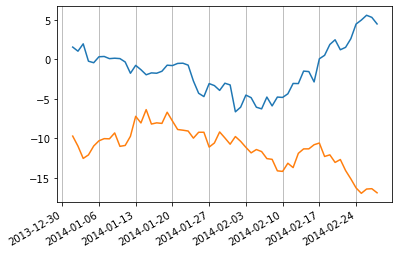

In [22]:
# this gets the plot so we can use it, we can ignore fig
fig, ax = plt.subplots()

# inform matplotlib that we will use the following as dates
# note we need to convert the index to a pydatetime series
ax.plot_date(walk_subset.index.to_pydatetime(), walk_subset, '-')

ax.xaxis.grid(True, "major") # turn off major tick grid lines

# do the major labels
ax.xaxis.set_major_locator(weekday_locator)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'));

# informs to rotate date labels
# fig 物件可調整刻度顯示格式
fig.autofmt_xdate();

# Bar plots

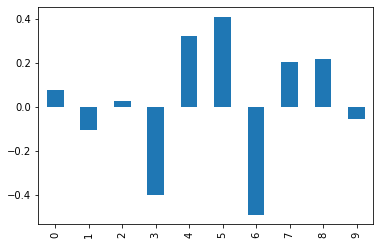

In [23]:
# make a bar plot
# create a small series of 10 random values centered at 0.0
np.random.seed(seedval)
s = pd.Series(np.random.rand(10) - 0.5)
# plot the bar chart
s.plot(kind='bar');

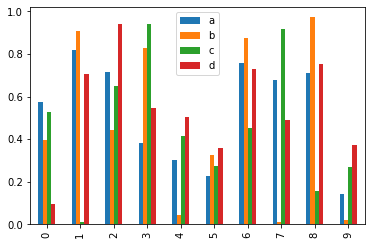

In [24]:
# draw a multiple series bar chart
# generate 4 columns of 10 random values
np.random.seed(seedval)
df2 = pd.DataFrame(np.random.rand(10, 4), 
                   columns=['a', 'b', 'c', 'd'])
# draw the multi-series bar chart
df2.plot(kind='bar');

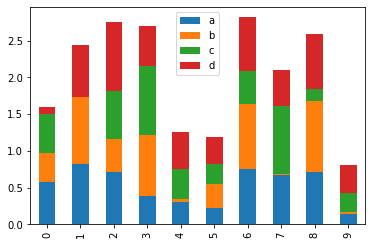

In [25]:
# horizontal stacked bar chart
df2.plot(kind='bar', stacked=True);

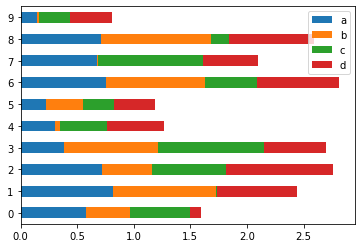

In [26]:
# horizontal stacked bar chart
df2.plot(kind='barh', stacked=True);

# Histograms

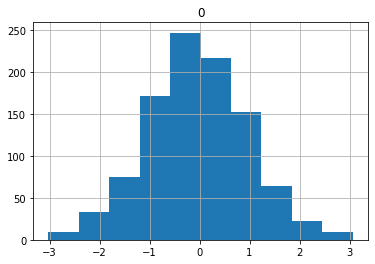

In [44]:
# create a histogram
np.random.seed(seedval)
# 1000 random numbers
dfh = pd.DataFrame(np.random.randn(1000))
# draw the histogram
# 忽略索引資訊，只針對數值統計區間分佈資訊後繪圖
dfh.hist();

In [45]:
dfh

            0
0   -1.878324
1    1.362367
2   -0.925862
3    0.064894
4   -0.437572
..        ...
995  0.638239
996 -0.616597
997 -0.232545
998 -0.097162
999  0.174166

[1000 rows x 1 columns]

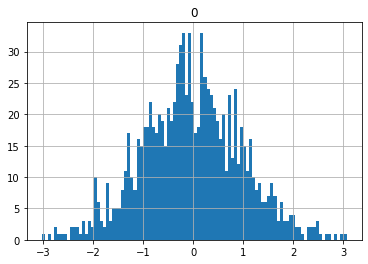

In [28]:
# histogram again, but with more bins
dfh.hist(bins = 100);

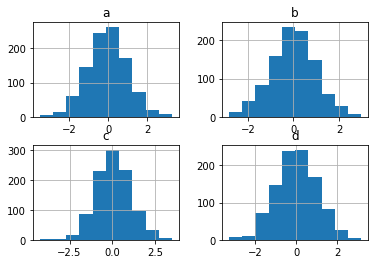

In [29]:
# generate multiple histogram plot
# create data frame with 4 columns of 1000 random values
np.random.seed(seedval)
dfh = pd.DataFrame(np.random.randn(1000, 4), 
                   columns=['a', 'b', 'c', 'd'])
# draw the chart.  There are four columns so pandas draws
# four histograms
dfh.hist();

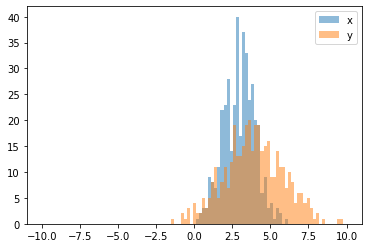

In [30]:
# directly use pyplot to overlay multiple histograms
# generate two distributions, each with a different
# mean and standard deviation
np.random.seed(seedval)
x = [np.random.normal(3,1) for _ in range(400)]
y = [np.random.normal(4,2) for _ in range(400)]

# specify the bins (-10 to 10 with 100 bins)
bins = np.linspace(-10, 10, 100)

# 全域物件也有 hist 函數
# generate plot x using plt.hist, 50% transparent
plt.hist(x, bins, alpha=0.5, label='x')
# generate plot y using plt.hist, 50% transparent
plt.hist(y, bins, alpha=0.5, label='y')
plt.legend(loc='upper right');

# Box and whisker plots

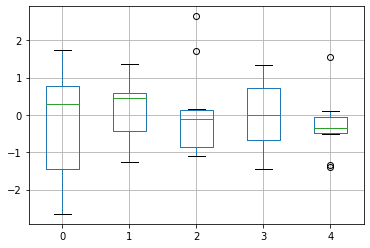

In [49]:
# create a box plot
# generate the series
np.random.seed(seedval)
dfb = pd.DataFrame(np.random.randn(10,5))
# generate the plot
# 每個欄位數值各自統計分佈資訊
dfb.boxplot(return_type='axes');

In [50]:
dfb

          0         1         2         3         4
0 -1.878324  1.362367 -0.925862  0.064894 -0.437572
1  1.738107  0.491208  0.167316  1.129883 -0.402668
2  0.073876  0.704181 -0.122904 -0.053066  0.106313
3 -2.652280 -0.708080 -1.101806 -0.836509 -1.350070
4  0.511343  0.355325  1.701553 -0.337359 -0.020597
5  0.839032  0.464744 -0.629987 -0.785945 -1.394383
6  0.620261 -1.152651 -0.103135  0.440016  1.544558
7  0.965943 -1.252908  2.642933  1.342999 -0.295199
8 -0.119870  0.465221 -1.086677  0.831922 -0.517407
9 -2.042879  0.602760  0.039995 -1.454979 -0.199571

# Area plots

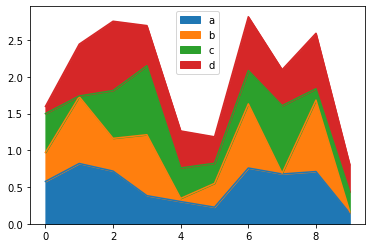

In [32]:
# create a stacked area plot
# generate a 4-column data frame of random data
np.random.seed(seedval)
dfa = pd.DataFrame(np.random.rand(10, 4), 
                   columns=['a', 'b', 'c', 'd'])
# create the area plot
# 區域圖預設會堆疊
dfa.plot(kind='area');

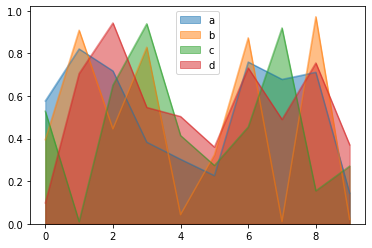

In [33]:
# do not stack the area plot
dfa.plot(kind='area', stacked=False);

# Scatter plots

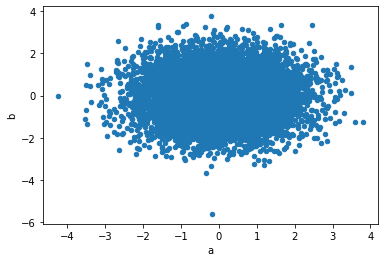

In [51]:
# generate a scatter plot of two series of normally
# distributed random values
# we would expect this to cluster around 0,0
np.random.seed(seedval)
sp_df = pd.DataFrame(np.random.randn(10000, 2), 
                     columns=['a', 'b'])
# 用二個欄位結合成為點的 XY 軸座標
sp_df.plot(kind='scatter', x='a', y='b');

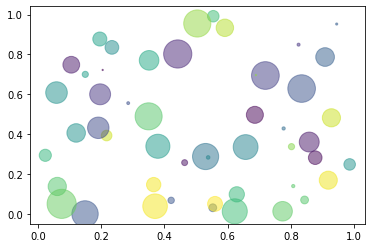

In [54]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

# 也可由全域物件提供的 scatter 畫分佈圖
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

# Density plot (kde)

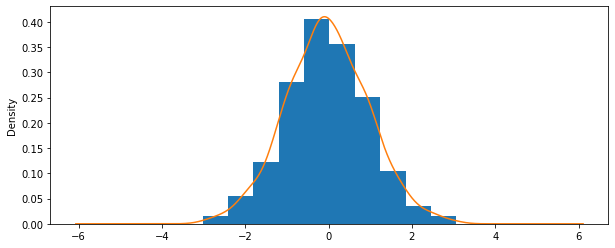

In [71]:
# create a kde densitiy plot
# generate a series of 1000 random numbers
np.random.seed(seedval)
s = pd.Series(np.random.randn(1000))
# generate the plot
s.hist(density=True) # 顯示預估曲線
s.plot(kind='kde', figsize=(10,4));

# Scatter plot matrix

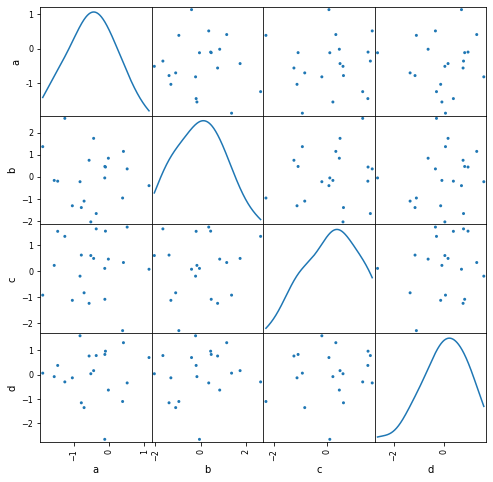

In [78]:
# create a scatter plot matrix
# import this class
from pandas.plotting import scatter_matrix

np.random.seed(seedval)
df_spm = pd.DataFrame(np.random.randn(20, 4), 
                      columns=['a', 'b', 'c', 'd'])
# create the scatter matrix
scatter_matrix(df_spm, alpha=1, figsize=(8, 8), diagonal='kde');

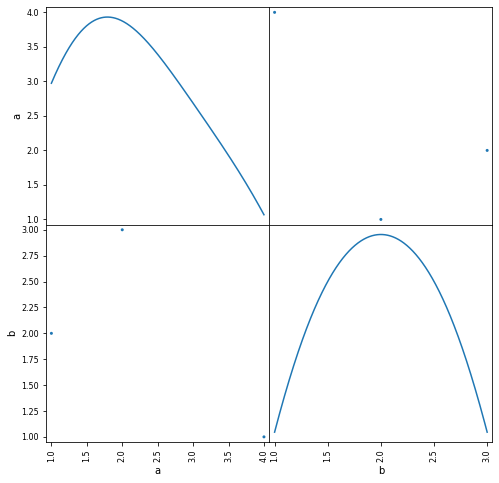

In [83]:
# 畫交叉相關圖
df_simple = pd.DataFrame([[1,2],[2,3],[4,1]], 
                      columns=['a', 'b'])
# create the scatter matrix
scatter_matrix(df_simple, alpha=1, figsize=(8, 8), diagonal='kde');

# Heatmaps

In [84]:
# create a heatmap
# start with data for the heatmap
s = pd.Series([0.0, 0.1, 0.2, 0.3, 0.4],
              ['V', 'W', 'X', 'Y', 'Z'])
heatmap_data = pd.DataFrame({'A' : s + 0.0,
                             'B' : s + 0.1,
                             'C' : s + 0.2,
                             'D' : s + 0.3,
                             'E' : s + 0.4,
                             'F' : s + 0.5,
                             'G' : s + 0.6
                     })
heatmap_data

     A    B    C    D    E    F    G
V  0.0  0.1  0.2  0.3  0.4  0.5  0.6
W  0.1  0.2  0.3  0.4  0.5  0.6  0.7
X  0.2  0.3  0.4  0.5  0.6  0.7  0.8
Y  0.3  0.4  0.5  0.6  0.7  0.8  0.9
Z  0.4  0.5  0.6  0.7  0.8  0.9  1.0

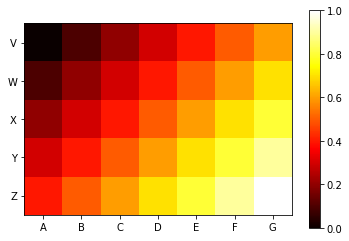

In [85]:
# 用顏色呈現三維資訊
# generate the heatmap
plt.imshow(heatmap_data, cmap='hot', interpolation='none')
plt.colorbar()  # add the scale of colors bar
# set the labels
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.yticks(range(len(heatmap_data)), heatmap_data.index);

> We will see an example of heatmaps to show correlations in the next chapter.

# Multiple Plots in a Single Chart

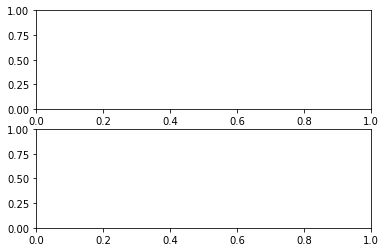

In [88]:
# create two sub plots on the new plot using a 2x1 grid
# ax1 is the upper row
ax1 = plt.subplot2grid(shape=(2,1), loc=(0,0))
# and ax2 is in the lower row
ax2 = plt.subplot2grid(shape=(2,1), loc=(1,0))

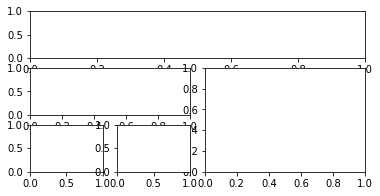

In [89]:
# layout sub plots on a 4x4 grid
# ax1 on top row, 4 columns wide
# 類似html table colspan&rowspan的用法，一樣從左上角開始，由左至右，由上而下
ax1 = plt.subplot2grid((4,4), (0,0), colspan=4)
# ax2 is row 2, leftmost and 2 columns wide
ax2 = plt.subplot2grid((4,4), (1,0), colspan=2)
# ax3 is 2 cols wide and 2 rows high, starting
# on second row and the third column
ax3 = plt.subplot2grid((4,4), (1,2), colspan=2, rowspan=2)
# ax4 1 high 1 wide, in row 4 column 0
ax4 = plt.subplot2grid((4,4), (2,0))
# ax4 1 high 1 wide, in row 4 column 1
ax5 = plt.subplot2grid((4,4), (2,1));

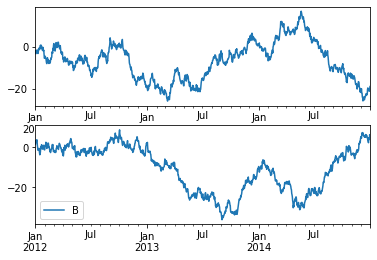

In [90]:
# demonstrating drawing into specific sub-plots
# generate a layout of 2 rows 1 column
# create the subplots, one on each row
ax5 = plt.subplot2grid((2,1), (0,0))
ax6 = plt.subplot2grid((2,1), (1,0))
# plot column 0 of walk_df into top row of the grid
walk_df[walk_df.columns[0]].plot(ax = ax5)
# and column 1 of walk_df into bottom row
walk_df[[walk_df.columns[1]]].plot(ax = ax6);

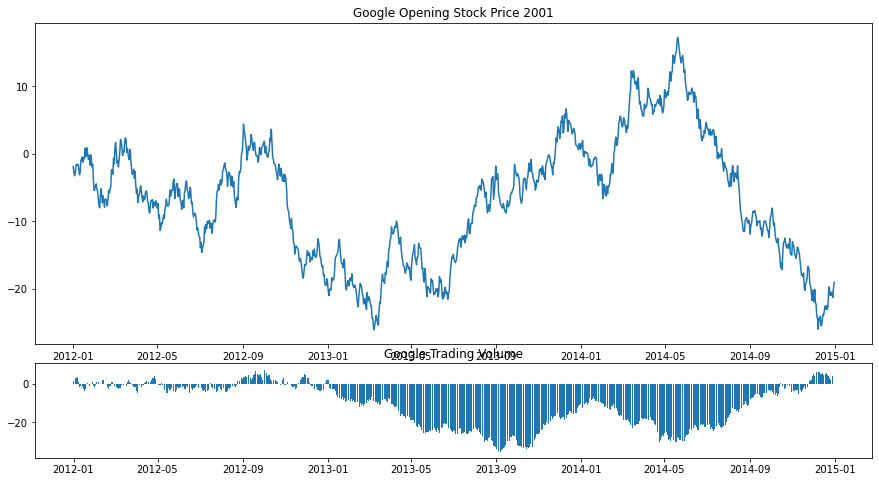

In [94]:
# draw the close on the top chart
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(walk_df.index, walk_df[walk_df.columns[0]], label='Close')
plt.title('Google Opening Stock Price 2001')

# draw the volume chart on the bottom
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(walk_df.index, walk_df[walk_df.columns[1]])
plt.title('Google Trading Volume')

# set the size of the plot
plt.gcf().set_size_inches(15,8)